In [230]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

In [231]:
missing_values = ['NA','NaN', 'Missing']
df = pd.read_csv('Downloads/stack-overflow-developer-survey-2023/survey_results_public.csv', na_values = missing_values)
df_schema = pd.read_csv('Downloads/stack-overflow-developer-survey-2023//survey_results_schema.csv')
pd.set_option('display.max_columns', None)
df.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,18,9,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,I have a great deal of influence,Investigate,Start a free trial;Ask developers I know/work ...,United States of America,USD\tUnited States dollar,285000.0,HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,Supabase,Firebase Realtime Database;Supabase,Amazon Web Services (AWS);Netlify;Vercel,Fly.io;Netlify;Render,Next.js;React;Remix;Vue.js,Deno;Elm;Nuxt.js;React;Svelte;Vue.js,Electron;React Native;Tauri,Capacitor;Electron;Tauri;Uno Platform;Xamarin,Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn,Godot;npm;pnpm;Unity 3D;Unreal Engine;Vite;Web...,Vim;Visual Studio Code,Vim;Visual Studio Code,iOS;iPadOS;MacOS;Windows;Windows Subsystem for...,MacOS;Windows;Windows Subsystem for Linux (WSL),Asana;Basecamp;GitHub Discussions;Jira;Linear;...,GitHub Discussions;Linear;Notion;Trello,Cisco Webex Teams;Discord;Google Chat;Google M...,Discord;Signal;Slack;Zoom,ChatGPT,ChatGPT;Neeva AI,GitHub Copilot,GitHub Copilot,Stack Overflow;Stack Exchange,Daily or almost daily,Yes,A few times per month or weekly,"Yes, definitely","I don't think it's super necessary, but I thin...",Yes,Indifferent,Other (please explain),Somewhat distrust,Learning about a codebase;Writing code;Debuggi...,Writing code;Committing and reviewing code,NaN,NaN,NaN,NaN,NaN,NaN,Yes,People manager,10.0,Strongly agree,Agree,Strongly agree,Agree,Agree,Agree,Agree,Strongly agree,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,NaN,27,23,"Developer, back-end

In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ResponseId                           89184 non-null  int64  
 1   Q120                                 89184 non-null  object 
 2   MainBranch                           89184 non-null  object 
 3   Age                                  89184 non-null  object 
 4   Employment                           87898 non-null  object 
 5   RemoteWork                           73810 non-null  object 
 6   CodingActivities                     73764 non-null  object 
 7   EdLevel                              87973 non-null  object 
 8   LearnCode                            87663 non-null  object 
 9   LearnCodeOnline                      70084 non-null  object 
 10  LearnCodeCoursesCert                 37076 non-null  object 
 11  YearsCode                   

In [233]:
df.shape

(89184, 84)

In [234]:
df.size


7491456

In [235]:
df.columns

Index(['ResponseId', 'Q120', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country',
       'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use',
       'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
       'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith',
       'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith',
       'AISearchWan

In [236]:
df.describe()

,ResponseId,CompTotal,WorkExp,ConvertedCompYearly
count,89184.000000,4.822500e+04,43579.000000,4.801900e+04
mean,44592.500000,1.036807e+42,11.405126,1.031101e+05
std,25745.347541,2.276847e+44,9.051989,6.814188e+05
min,1.000000,0.000000e+00,0.000000,1.000000e+00
25%,22296.750000,6.300000e+04,5.000000,4.390700e+04
50%,44592.500000,1.150000e+05,9.000000,7.496300e+04
75%,66888.250000,2.300000e+05,16.000000,1.216410e+05
max,89184.000000,5.000000e+46,50.000000,7.435143e+07


In [237]:
df.isna().sum()

ResponseId                 0
Q120                       0
MainBranch                 0
Age                        0
Employment              1286
                       ...  
ProfessionalTech       47401
Industry               52410
SurveyLength            2699
SurveyEase              2630
ConvertedCompYearly    41165
Length: 84, dtype: int64

In [238]:
print(df['LearnCode'].isna().sum())
print(df['LearnCodeOnline'].isna().sum())
print(df['Country'].isna().sum())
print(df['Age'].isna().sum())

1521
19100
1211
0


In [239]:
cleaned_data_Country= df.dropna(subset = ['Country']).copy()
print(cleaned_data_Country['Country'].isna().sum())
print(cleaned_data_Country.shape)
cleaned_data_Country.head()

0
(87973, 84)


,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,18,9,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,I have a great deal of influence,Investigate,Start a free trial;Ask developers I know/work ...,United States of America,USD\tUnited States dollar,285000.0,HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,Supabase,Firebase Realtime Database;Supabase,Amazon Web Services (AWS);Netlify;Vercel,Fly.io;Netlify;Render,Next.js;React;Remix;Vue.js,Deno;Elm;Nuxt.js;React;Svelte;Vue.js,Electron;React Native;Tauri,Capacitor;Electron;Tauri;Uno Platform;Xamarin,Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn,Godot;npm;pnpm;Unity 3D;Unreal Engine;Vite;Web...,Vim;Visual Studio Code,Vim;Visual Studio Code,iOS;iPadOS;MacOS;Windows;Windows Subsystem for...,MacOS;Windows;Windows Subsystem for Linux (WSL),Asana;Basecamp;GitHub Discussions;Jira;Linear;...,GitHub Discussions;Linear;Notion;Trello,Cisco Webex Teams;Discord;Google Chat;Google M...,Discord;Signal;Slack;Zoom,ChatGPT,ChatGPT;Neeva AI,GitHub Copilot,GitHub Copilot,Stack Overflow;Stack Exchange,Daily or almost daily,Yes,A few times per month or weekly,"Yes, definitely","I don't think it's super necessary, but I thin...",Yes,Indifferent,Other (please explain),Somewhat distrust,Learning about a codebase;Writing code;Debuggi...,Writing code;Committing and reviewing code,NaN,NaN,NaN,NaN,NaN,NaN,Yes,People manager,10.0,Strongly agree,Agree,Strongly agree,Agree,Agree,Agree,Agree,Strongly agree,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,NaN,27,23,"Developer, back-end","5,000 to 9,999 employees",I have some influence,Given a list,Start a free trial;Ask developers I know/work ...,United States of America,USD\tUnited States dollar,250000.0,Bash/Shell (all shells);Go,Haskell;OCaml;Rust,NaN,NaN,Amazon Web Services (AWS);Google Cloud;OpenSta...,NaN,NaN,NaN,NaN,NaN,Cargo;Docker;Kubernetes;Make;Nix,Cargo;Kubernetes;Nix,Emacs;Heli

In [240]:
cleaned_data_Country['Country'].unique()

array(['United States of America', 'Philippines',
       'United Kingdom of Great Britain and Northern Ireland', 'Finland',
       'India', 'Australia', 'Netherlands', 'Germany', 'Sweden', 'France',
       'Albania', 'Nigeria', 'Spain', 'South Africa', 'Belgium', 'Italy',
       'Brazil', 'Portugal', 'Bangladesh', 'Canada', 'Argentina',
       'Switzerland', 'Sri Lanka', 'Poland', 'Lebanon', 'Lithuania',
       'Serbia', 'Cyprus', 'China', 'Bahrain',
       'Iran, Islamic Republic of...', 'Pakistan', 'Egypt',
       'Russian Federation', 'Turkey', 'Slovakia', 'Latvia', 'Greece',
       'Austria', 'Denmark', 'Israel', 'Norway', 'Hungary', 'Singapore',
       'United Arab Emirates', 'Croatia', 'Czech Republic', 'Kosovo',
       'Nepal', 'Slovenia', 'Romania', 'Luxembourg', 'Indonesia',
       'Tunisia', 'Republic of Korea', 'Viet Nam', 'Ukraine', 'Kenya',
       'Nomadic', 'Dominican Republic', 'Morocco', 'Uzbekistan',
       'Belarus', 'Isle of Man', 'Estonia', 'Bulgaria',
       'The f

In [241]:
grouped_df_Country = cleaned_data_Country.groupby(['Country'])['Country'].value_counts().reset_index()
sorted_df_Country = grouped_df_Country.sort_values('count', ascending = False)
sorted_df_Country = sorted_df_Country.reset_index()
total = cleaned_data_Country['ResponseId'].nunique()
sorted_df_Country['Percentage'] = round((sorted_df_Country['count'] / total) * 100, 2)
sorted_df_Country.head()

,index,Country,count,Percentage
0,177,United States of America,18647,21.20
1,59,Germany,7328,8.33
2,72,India,5625,6.39
3,175,United Kingdom of Great Britain and Northern I...,5552,6.31
4,30,Canada,3507,3.99


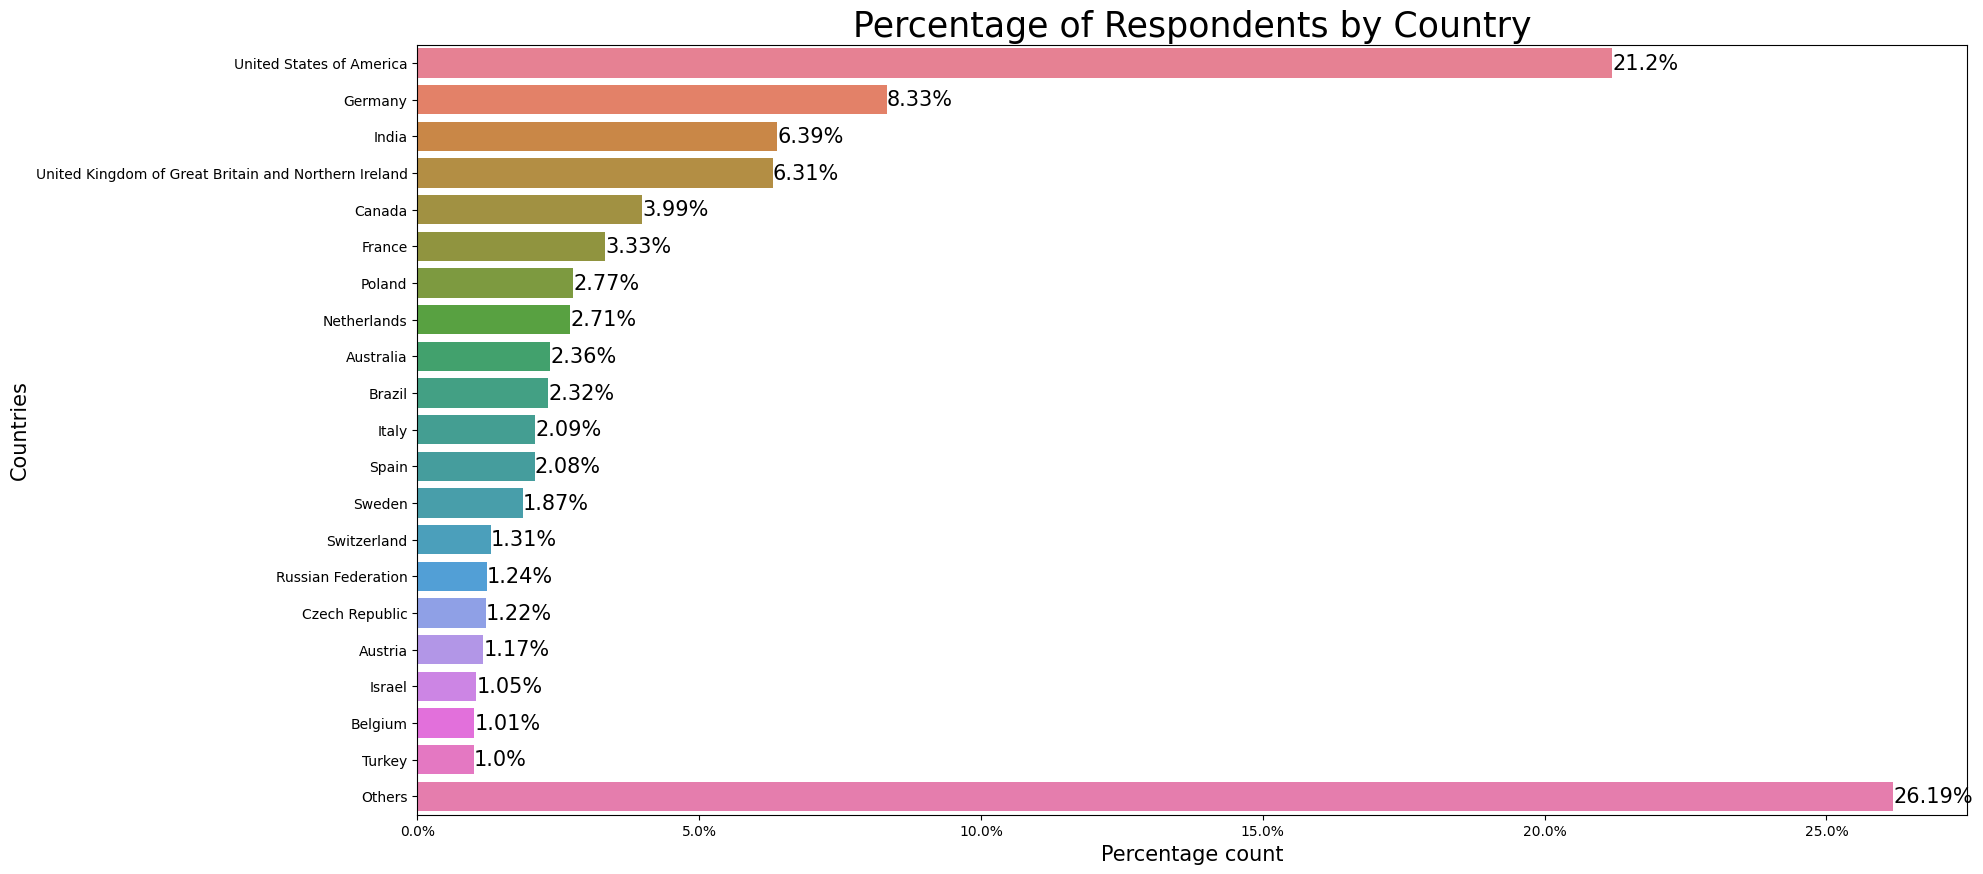

In [242]:
N = 20
top_countries = sorted_df_Country.head(N)
other_countries = sorted_df_Country.iloc[N:]
sum_other_percentage = round(other_countries['Percentage'].sum(),2)
others_row = pd.DataFrame({'Country': ['Others'], 'Percentage': [sum_other_percentage]})
top_countries = pd.concat([top_countries, others_row])

fig = plt.figure(figsize=(20, 10))
colors = sns.color_palette("husl", len(top_countries))
ax = sns.barplot(data=top_countries,
                 x='Percentage',
                 y='Country',
                 orient='h',
                 palette=colors,
                 hue='Country',
                 legend=False)

for index, value in enumerate(top_countries['Percentage']):
    plt.text(value, index, f'{value}%', va='center', fontsize=15)


def add_percent_sign(x, pos):
    return f'{x}%'

plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(add_percent_sign))

plt.title('Percentage of Respondents by Country', fontsize=25)
ax.set_xlabel('Percentage count', fontsize=15)
ax.set_ylabel('Countries', fontsize=15)
plt.show()

In [243]:
cleaned_data_learnCode= df.dropna(subset = ['LearnCode']).copy()
print(cleaned_data_learnCode['LearnCode'].isna().sum())
print(cleaned_data_learnCode.shape)
cleaned_data_learnCodeOnline= df.dropna(subset = ['LearnCodeOnline']).copy()
print(cleaned_data_learnCodeOnline['LearnCodeOnline'].isna().sum())
print(cleaned_data_learnCodeOnline.shape)


0
(87663, 84)
0
(70084, 84)


In [244]:
cleaned_data_learnCode['LearnCode'] = cleaned_data_learnCode['LearnCode'].astype(str)

In [245]:
cleaned_data_learnCode['LearnCode'] = cleaned_data_learnCode['LearnCode'].str.split(';')

In [246]:
exploded_df = cleaned_data_learnCode.explode('LearnCode')
exploded_df.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media,Formal documentation provided by the owner of ...,Other,18,9,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,I have a great deal of influence,Investigate,Start a free trial;Ask developers I know/work ...,United States of America,USD\tUnited States dollar,285000.0,HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,Supabase,Firebase Realtime Database;Supabase,Amazon Web Services (AWS);Netlify;Vercel,Fly.io;Netlify;Render,Next.js;React;Remix;Vue.js,Deno;Elm;Nuxt.js;React;Svelte;Vue.js,Electron;React Native;Tauri,Capacitor;Electron;Tauri;Uno Platform;Xamarin,Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn,Godot;npm;pnpm;Unity 3D;Unreal Engine;Vite;Web...,Vim;Visual Studio Code,Vim;Visual Studio Code,iOS;iPadOS;MacOS;Windows;Windows Subsystem for...,MacOS;Windows;Windows Subsystem for Linux (WSL),Asana;Basecamp;GitHub Discussions;Jira;Linear;...,GitHub Discussions;Linear;Notion;Trello,Cisco Webex Teams;Discord;Google Chat;Google M...,Discord;Signal;Slack;Zoom,ChatGPT,ChatGPT;Neeva AI,GitHub Copilot,GitHub Copilot,Stack Overflow;Stack Exchange,Daily or almost daily,Yes,A few times per month or weekly,"Yes, definitely","I don't think it's super necessary, but I thin...",Yes,Indifferent,Other (please explain),Somewhat distrust,Learning about a codebase;Writing code;Debuggi...,Writing code;Committing and reviewing code,NaN,NaN,NaN,NaN,NaN,NaN,Yes,People manager,10.0,Strongly agree,Agree,Strongly agree,Agree,Agree,Agree,Agree,Strongly agree,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague,Formal documentation provided by the owner of ...,Other,18,9,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,I have a great deal of influence,Investigate,Start a free trial;Ask developers I know/work ...,United States of America,USD\tUnited States dollar,285000.0,HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,Supabase,Firebase Realtime Database;Supabase,Amazon Web Services (AWS);Netlify;Vercel,Fly.io;Netlify;Render,Next.js;React;Remix;Vue.js,Deno;Elm;Nuxt.js;React;Svelte;Vue.js,Electron;React Nativ

In [247]:
exploded_df['LearnCode'].unique()

array(['Books / Physical media', 'Colleague', 'Friend or family member',
       'Hackathons (virtual or in-person)',
       'Online Courses or Certification', 'On the job training',
       'Other online resources (e.g., videos, blogs, forum)',
       'School (i.e., University, College, etc)', 'Coding Bootcamp',
       'Other (please specify):'], dtype=object)

In [248]:
mask = exploded_df['LearnCode'] != 'Other (please specify):'
exploded_df = exploded_df[mask]
exploded_df['LearnCode'].unique()

array(['Books / Physical media', 'Colleague', 'Friend or family member',
       'Hackathons (virtual or in-person)',
       'Online Courses or Certification', 'On the job training',
       'Other online resources (e.g., videos, blogs, forum)',
       'School (i.e., University, College, etc)', 'Coding Bootcamp'],
      dtype=object)

In [249]:
print(exploded_df['ResponseId'].nunique())

86992


In [250]:
grouped_df_LearnCode = exploded_df.groupby(['LearnCode'])['LearnCode'].value_counts().reset_index()
sorted_df_LearnCode = grouped_df_LearnCode.sort_values('count', ascending = False)
sorted_df_LearnCode = sorted_df_LearnCode.reset_index()
total = exploded_df['ResponseId'].nunique()
sorted_df_LearnCode['Percentage'] = round((sorted_df_LearnCode['count'] / total) * 100, 2)
sorted_df_LearnCode.head()

,index,LearnCode,count,Percentage
0,7,"Other online resources (e.g., videos, blogs, f...",70244,80.75
1,0,Books / Physical media,45406,52.20
2,8,"School (i.e., University, College, etc)",43957,50.53
3,6,Online Courses or Certification,43201,49.66
4,5,On the job training,40380,46.42


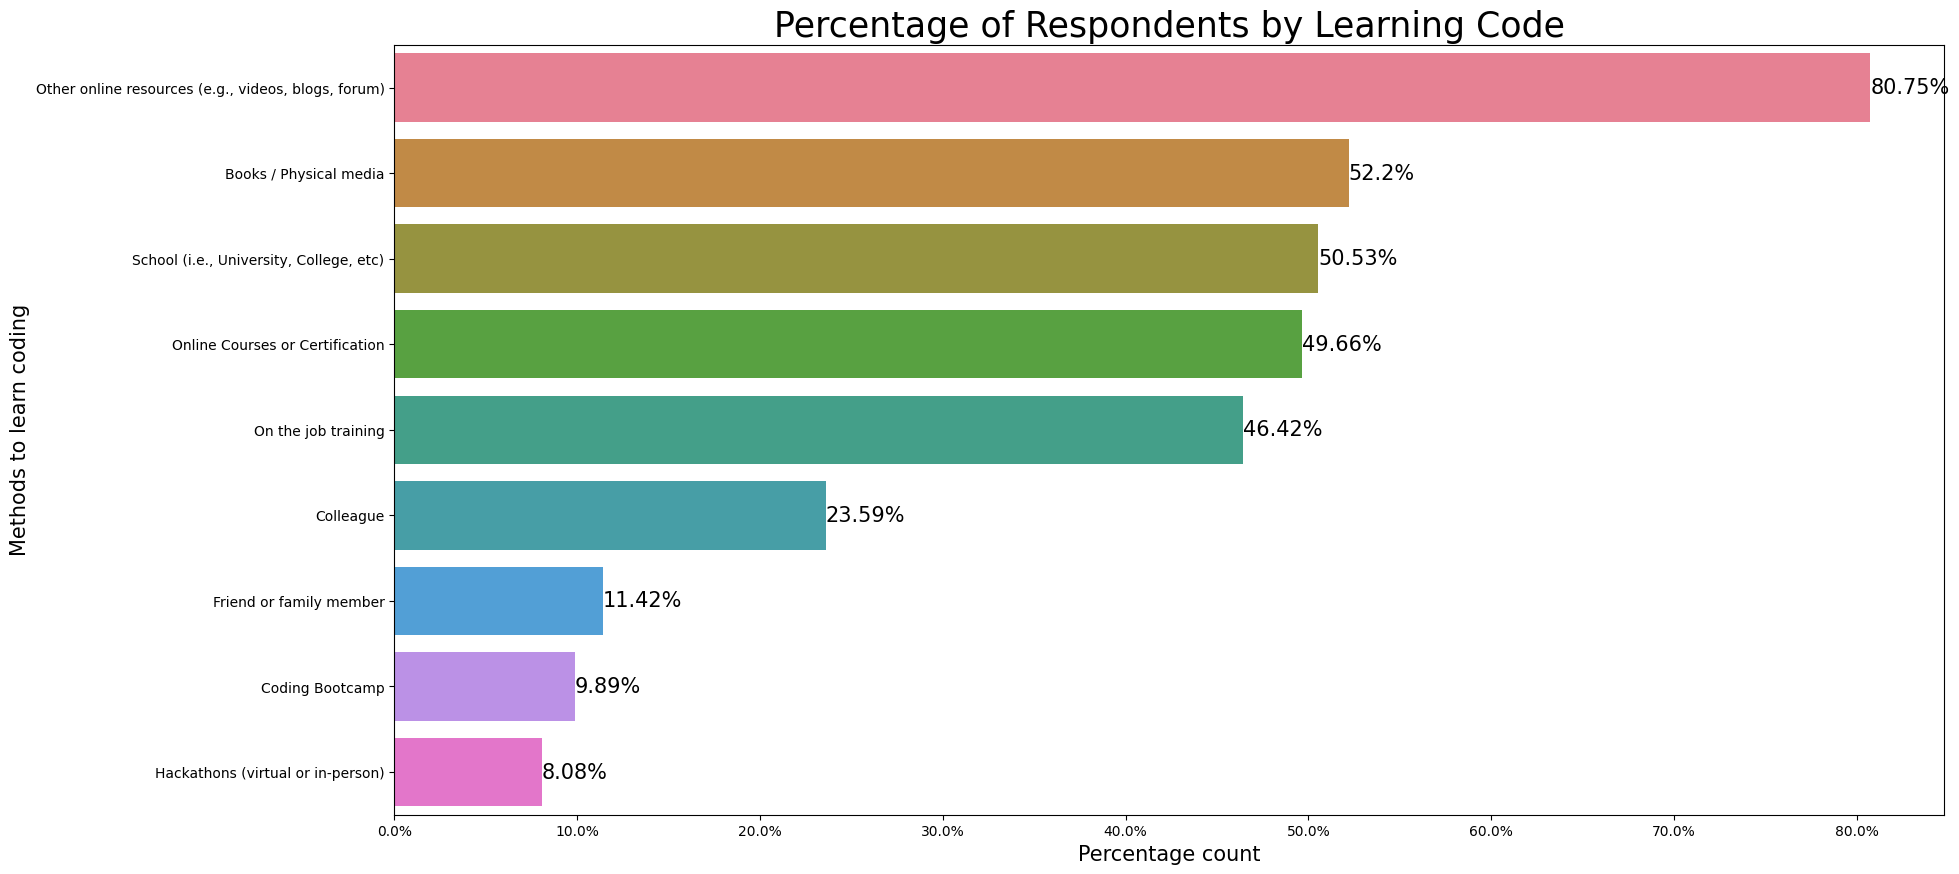

In [251]:
fig = plt.figure(figsize=(20,10))
colors = sns.color_palette("husl", len(sorted_df_LearnCode))
ax = sns.barplot(data=sorted_df_LearnCode,
            x='Percentage',
            y= 'LearnCode',
            orient = 'h',
            palette=colors,
            hue='LearnCode',  
            legend=False)


for index, value in enumerate(sorted_df_LearnCode['Percentage']):
    plt.text(value, index, f'{value}%', va='center', fontsize = 15)
    
  
def add_percent_sign(x, pos):
    return f'{x}%'


plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(add_percent_sign))

plt.title('Percentage of Respondents by Learning Code', fontsize = 25)
ax.set_xlabel('Percentage count', fontsize = 15)
ax.set_ylabel('Methods to learn coding', fontsize = 15)
plt.show()

In [252]:
cleaned_data_learnCodeOnline['LearnCodeOnline'] = cleaned_data_learnCodeOnline['LearnCodeOnline'].astype(str)
cleaned_data_learnCodeOnline['LearnCodeOnline'] = cleaned_data_learnCodeOnline['LearnCodeOnline'].str.split(';')
exploded_df_learnCodeOnline = cleaned_data_learnCodeOnline.explode('LearnCodeOnline')
exploded_df_learnCodeOnline.head()


,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,18,9,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,I have a great deal of influence,Investigate,Start a free trial;Ask developers I know/work ...,United States of America,USD\tUnited States dollar,285000.0,HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,Supabase,Firebase Realtime Database;Supabase,Amazon Web Services (AWS);Netlify;Vercel,Fly.io;Netlify;Render,Next.js;React;Remix;Vue.js,Deno;Elm;Nuxt.js;React;Svelte;Vue.js,Electron;React Native;Tauri,Capacitor;Electron;Tauri;Uno Platform;Xamarin,Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn,Godot;npm;pnpm;Unity 3D;Unreal Engine;Vite;Web...,Vim;Visual Studio Code,Vim;Visual Studio Code,iOS;iPadOS;MacOS;Windows;Windows Subsystem for...,MacOS;Windows;Windows Subsystem for Linux (WSL),Asana;Basecamp;GitHub Discussions;Jira;Linear;...,GitHub Discussions;Linear;Notion;Trello,Cisco Webex Teams;Discord;Google Chat;Google M...,Discord;Signal;Slack;Zoom,ChatGPT,ChatGPT;Neeva AI,GitHub Copilot,GitHub Copilot,Stack Overflow;Stack Exchange,Daily or almost daily,Yes,A few times per month or weekly,"Yes, definitely","I don't think it's super necessary, but I thin...",Yes,Indifferent,Other (please explain),Somewhat distrust,Learning about a codebase;Writing code;Debuggi...,Writing code;Committing and reviewing code,NaN,NaN,NaN,NaN,NaN,NaN,Yes,People manager,10.0,Strongly agree,Agree,Strongly agree,Agree,Agree,Agree,Agree,Strongly agree,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Blogs with tips and tricks,Other,18,9,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,I have a great deal of influence,Investigate,Start a free trial;Ask developers I know/work ...,United States of America,USD\tUnited States dollar,285000.0,HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,Supabase,Firebase Realtime Database;Supabase,Amazon Web Services (AWS);Netlify;Vercel,Fly.io;Netlify;Render,Next.js;React;Remix;Vue.js,Deno;Elm;Nuxt

In [253]:
exploded_df_learnCodeOnline['LearnCodeOnline'].unique()

array(['Formal documentation provided by the owner of the tech',
       'Blogs with tips and tricks', 'Books', 'Recorded coding sessions',
       'How-to videos', 'Video-based Online Courses',
       'Written-based Online Courses',
       'Auditory material (e.g., podcasts)',
       'Online challenges (e.g., daily or weekly coding challenges)',
       'Written Tutorials', 'Click to write Choice 20', 'Stack Overflow',
       'Interactive tutorial', 'Certification videos',
       'Programming Games', 'Other (Please specify):'], dtype=object)

In [254]:
mask2 = (exploded_df_learnCodeOnline['LearnCodeOnline'] != 'Other (Please specify):') & (exploded_df_learnCodeOnline['LearnCodeOnline'] != 'Click to write Choice 20')
exploded_df_learnCodeOnline = exploded_df_learnCodeOnline[mask2]
exploded_df_learnCodeOnline['LearnCodeOnline'].unique()


array(['Formal documentation provided by the owner of the tech',
       'Blogs with tips and tricks', 'Books', 'Recorded coding sessions',
       'How-to videos', 'Video-based Online Courses',
       'Written-based Online Courses',
       'Auditory material (e.g., podcasts)',
       'Online challenges (e.g., daily or weekly coding challenges)',
       'Written Tutorials', 'Stack Overflow', 'Interactive tutorial',
       'Certification videos', 'Programming Games'], dtype=object)

In [255]:
print(exploded_df_learnCodeOnline['ResponseId'].nunique())

70059


In [256]:
grouped_df_LearnCodeOnline = exploded_df_learnCodeOnline.groupby(['LearnCodeOnline'])['LearnCodeOnline'].value_counts().reset_index()
sorted_df_LearnCodeOnline = grouped_df_LearnCodeOnline.sort_values('count', ascending = False)
sorted_df_LearnCodeOnline = sorted_df_LearnCodeOnline.reset_index()
total = exploded_df_learnCodeOnline['ResponseId'].nunique()
sorted_df_LearnCodeOnline['Percentage'] = round((sorted_df_LearnCodeOnline['count'] / total) * 100, 2)
sorted_df_LearnCodeOnline.head()

,index,LearnCodeOnline,count,Percentage
0,4,Formal documentation provided by the owner of ...,63329,90.39
1,10,Stack Overflow,57861,82.59
2,1,Blogs with tips and tricks,53745,76.71
3,5,How-to videos,42149,60.16
4,12,Written Tutorials,42012,59.97


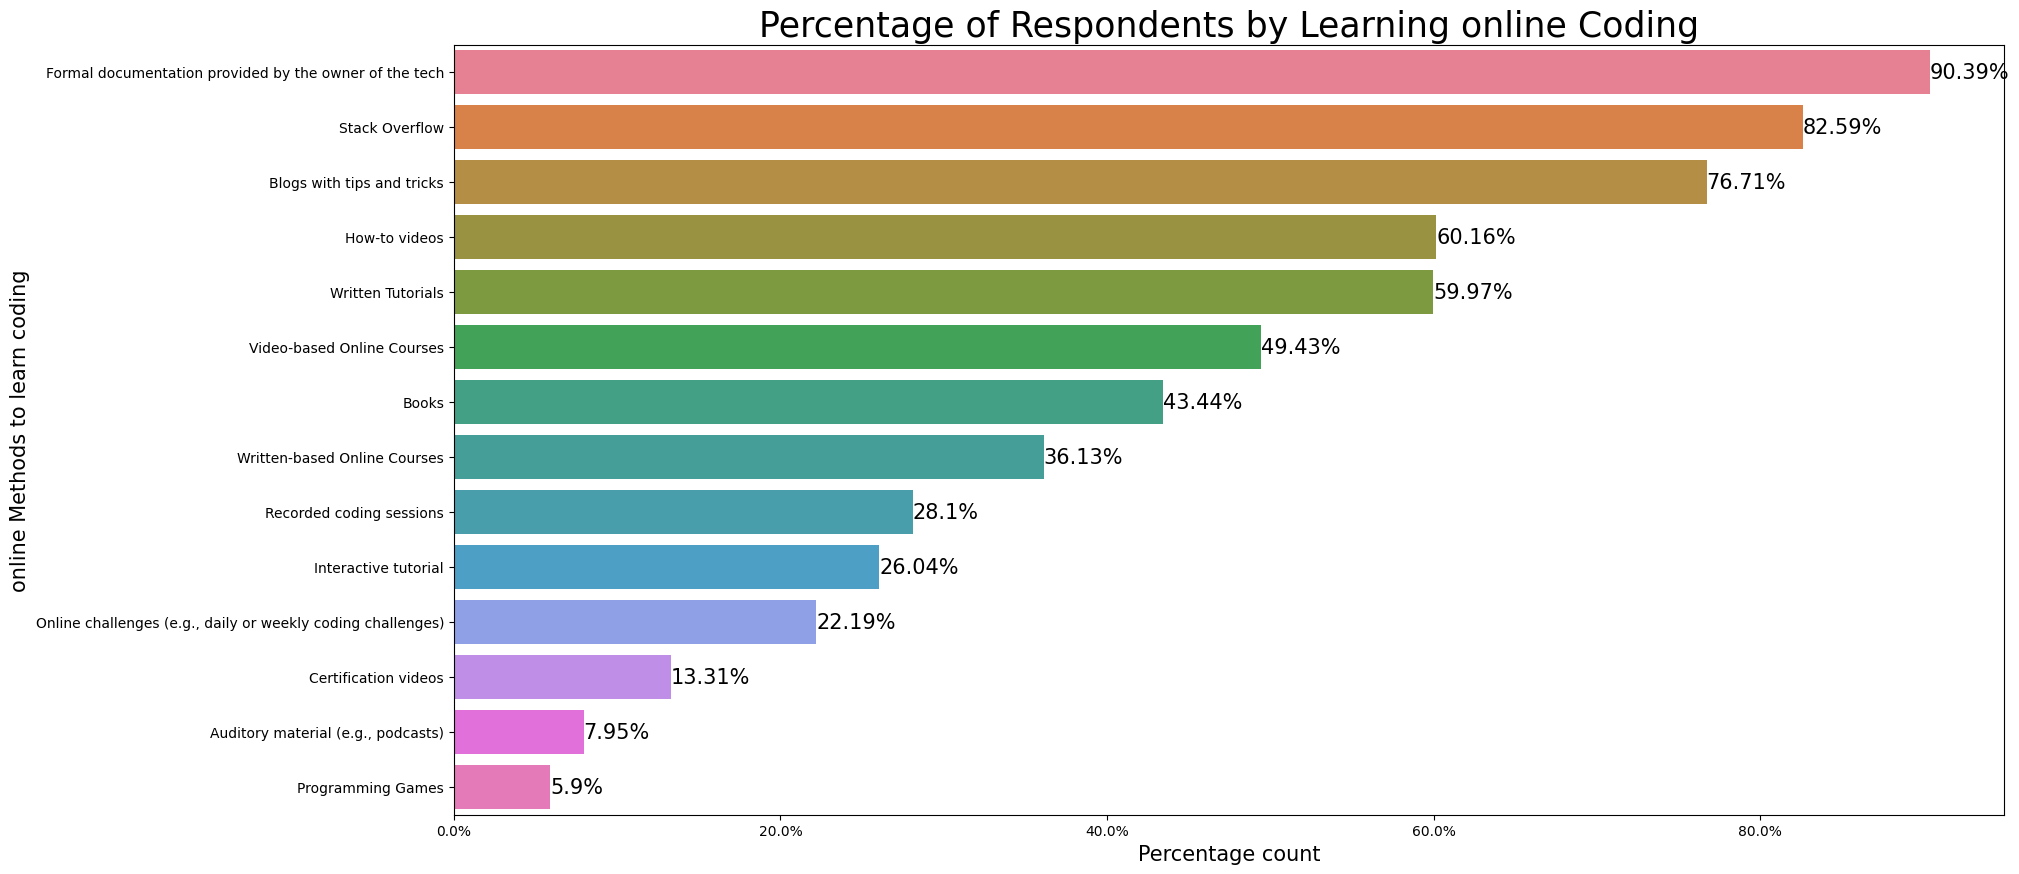

In [257]:
fig = plt.figure(figsize=(20,10))
colors = sns.color_palette("husl", len(sorted_df_LearnCodeOnline))
ax = sns.barplot(data=sorted_df_LearnCodeOnline,
            x='Percentage',
            y= 'LearnCodeOnline',
            orient = 'h',
            palette=colors,
            hue='LearnCodeOnline',  
            legend=False)

for index, value in enumerate(sorted_df_LearnCodeOnline['Percentage']):
    plt.text(value, index, f'{value}%', va='center', fontsize = 15)
    
  
def add_percent_sign(x, pos):
    return f'{x}%'


plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(add_percent_sign))

plt.title('Percentage of Respondents by Learning online Coding', fontsize = 25)
ax.set_xlabel('Percentage count', fontsize = 15)
ax.set_ylabel('online Methods to learn coding', fontsize = 15)
plt.show()

In [258]:
exploded_df['Age'].unique()

array(['25-34 years old', '45-54 years old', '35-44 years old',
       'Under 18 years old', '55-64 years old', '18-24 years old',
       '65 years or older', 'Prefer not to say'], dtype=object)

In [259]:
mask3 = exploded_df['Age'] != 'Prefer not to say'
exploded_df = exploded_df[mask3]
exploded_df['Age'].unique()
print(exploded_df['ResponseId'].nunique())

86688


In [260]:
grouped_df_Age = exploded_df.groupby(['Age'])
dfs = {}
for category, group_df in grouped_df_Age:
    dfs[category] = group_df.copy()
for category, df_category in dfs.items():
    print(f"Data for Category '{category}':")
dfs[('25-34 years old',)].head()

Data for Category '('18-24 years old',)':
Data for Category '('25-34 years old',)':
Data for Category '('35-44 years old',)':
Data for Category '('45-54 years old',)':
Data for Category '('55-64 years old',)':
Data for Category '('65 years or older',)':
Data for Category '('Under 18 years old',)':


,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media,Formal documentation provided by the owner of ...,Other,18,9,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,I have a great deal of influence,Investigate,Start a free trial;Ask developers I know/work ...,United States of America,USD\tUnited States dollar,285000.0,HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,Supabase,Firebase Realtime Database;Supabase,Amazon Web Services (AWS);Netlify;Vercel,Fly.io;Netlify;Render,Next.js;React;Remix;Vue.js,Deno;Elm;Nuxt.js;React;Svelte;Vue.js,Electron;React Native;Tauri,Capacitor;Electron;Tauri;Uno Platform;Xamarin,Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn,Godot;npm;pnpm;Unity 3D;Unreal Engine;Vite;Web...,Vim;Visual Studio Code,Vim;Visual Studio Code,iOS;iPadOS;MacOS;Windows;Windows Subsystem for...,MacOS;Windows;Windows Subsystem for Linux (WSL),Asana;Basecamp;GitHub Discussions;Jira;Linear;...,GitHub Discussions;Linear;Notion;Trello,Cisco Webex Teams;Discord;Google Chat;Google M...,Discord;Signal;Slack;Zoom,ChatGPT,ChatGPT;Neeva AI,GitHub Copilot,GitHub Copilot,Stack Overflow;Stack Exchange,Daily or almost daily,Yes,A few times per month or weekly,"Yes, definitely","I don't think it's super necessary, but I thin...",Yes,Indifferent,Other (please explain),Somewhat distrust,Learning about a codebase;Writing code;Debuggi...,Writing code;Committing and reviewing code,NaN,NaN,NaN,NaN,NaN,NaN,Yes,People manager,10.0,Strongly agree,Agree,Strongly agree,Agree,Agree,Agree,Agree,Strongly agree,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague,Formal documentation provided by the owner of ...,Other,18,9,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,I have a great deal of influence,Investigate,Start a free trial;Ask developers I know/work ...,United States of America,USD\tUnited States dollar,285000.0,HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,Supabase,Firebase Realtime Database;Supabase,Amazon Web Services (AWS);Netlify;Vercel,Fly.io;Netlify;Render,Next.js;React;Remix;Vue.js,Deno;Elm;Nuxt.js;React;Svelte;Vue.js,Electron;React Nativ

In [261]:
print('Number of unique responses for under 18 years old:' + ' ' + str(dfs[('Under 18 years old',)]['ResponseId'].nunique()))
print('Number of unique responses for 18-24 years old:' + ' ' + str(dfs[('18-24 years old',)]['ResponseId'].nunique()))
print('Number of unique responses for 25-34 years old:' + ' ' + str(dfs[('25-34 years old',)]['ResponseId'].nunique()))
print('Number of unique responses for 35-44 years old:' + ' ' + str(dfs[('35-44 years old',)]['ResponseId'].nunique()))
print('Number of unique responses for 45-54 years old:' + ' ' + str(dfs[('45-54 years old',)]['ResponseId'].nunique()))  
print('Number of unique responses for 55-64 years old:' + ' ' + str(dfs[('55-64 years old',)]['ResponseId'].nunique()))
print('Number of unique responses for 65 years or older:' + ' '+ str(dfs[('65 years or older',)]['ResponseId'].nunique()))

Number of unique responses for under 18 years old: 3927
Number of unique responses for 18-24 years old: 17501
Number of unique responses for 25-34 years old: 32669
Number of unique responses for 35-44 years old: 20075
Number of unique responses for 45-54 years old: 8111
Number of unique responses for 55-64 years old: 3288
Number of unique responses for 65 years or older: 1117


In [262]:
segment_grouped_dfs = {}


for key, dfr in dfs.items():
    segment_grouped_dfs[key] = dfr.groupby(['LearnCode'])['LearnCode'].value_counts().reset_index()
    segment_grouped_dfs[key] = segment_grouped_dfs[key].sort_values('count', ascending = False)
    segment_grouped_dfs[key] = segment_grouped_dfs[key].reset_index()
    total = dfs[(key)]['ResponseId'].nunique()
    segment_grouped_dfs[key]['Percentage'] = round((segment_grouped_dfs[key]['count'] / total) * 100, 1)
    segment_grouped_dfs[key].drop(labels = 'index', axis = 1, inplace = True)
    

segment_grouped_dfs[('Under 18 years old',)].head()

,LearnCode,count,Percentage
0,"Other online resources (e.g., videos, blogs, f...",3469,88.3
1,Online Courses or Certification,1551,39.5
2,Books / Physical media,1419,36.1
3,"School (i.e., University, College, etc)",1344,34.2
4,Friend or family member,759,19.3


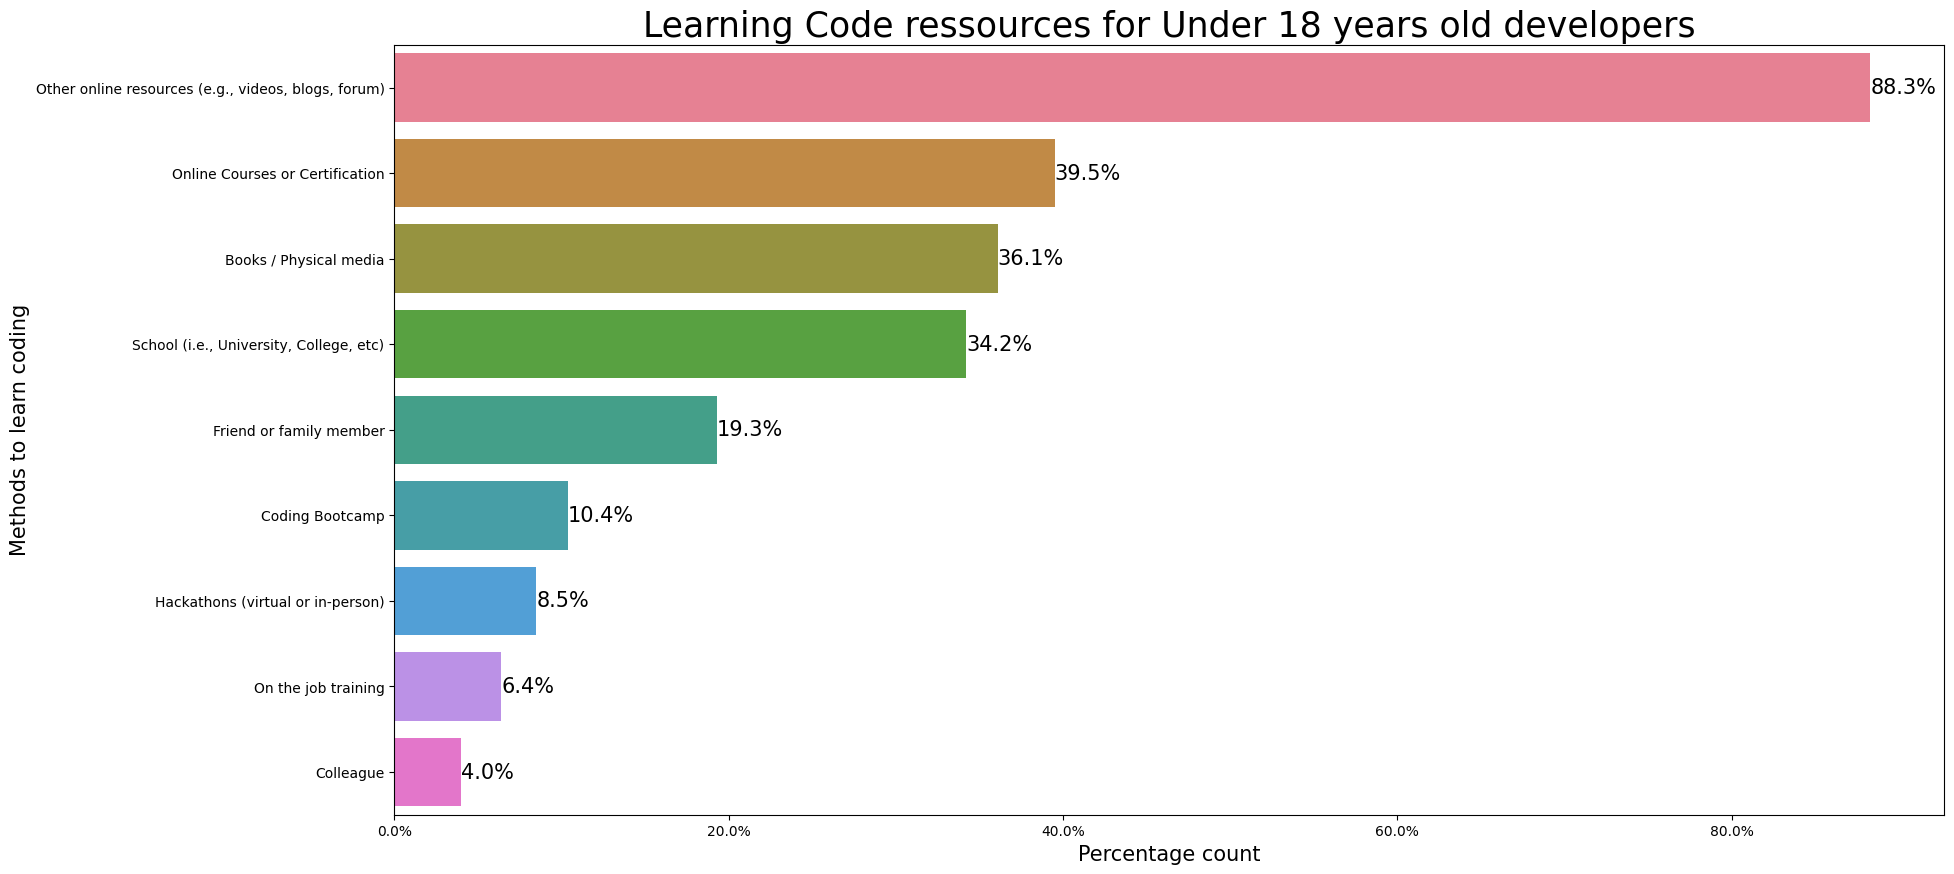

In [263]:
fig = plt.figure(figsize=(20,10))
colors = sns.color_palette("husl", len(segment_grouped_dfs[('Under 18 years old',)]))
ax = sns.barplot(data=segment_grouped_dfs[('Under 18 years old',)],
            x='Percentage',
            y= 'LearnCode',
            orient = 'h',
            palette=colors,
            hue='LearnCode',  
            legend=False)

for index, value in enumerate(segment_grouped_dfs[('Under 18 years old',)]['Percentage']):
    plt.text(value, index, f'{value}%', va='center', fontsize = 15)
    
  
def add_percent_sign(x, pos):
    return f'{x}%'


plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(add_percent_sign))
plt.title('Learning Code ressources for Under 18 years old developers', fontsize = 25)
ax.set_xlabel('Percentage count', fontsize = 15)
ax.set_ylabel('Methods to learn coding', fontsize = 15)
plt.show()

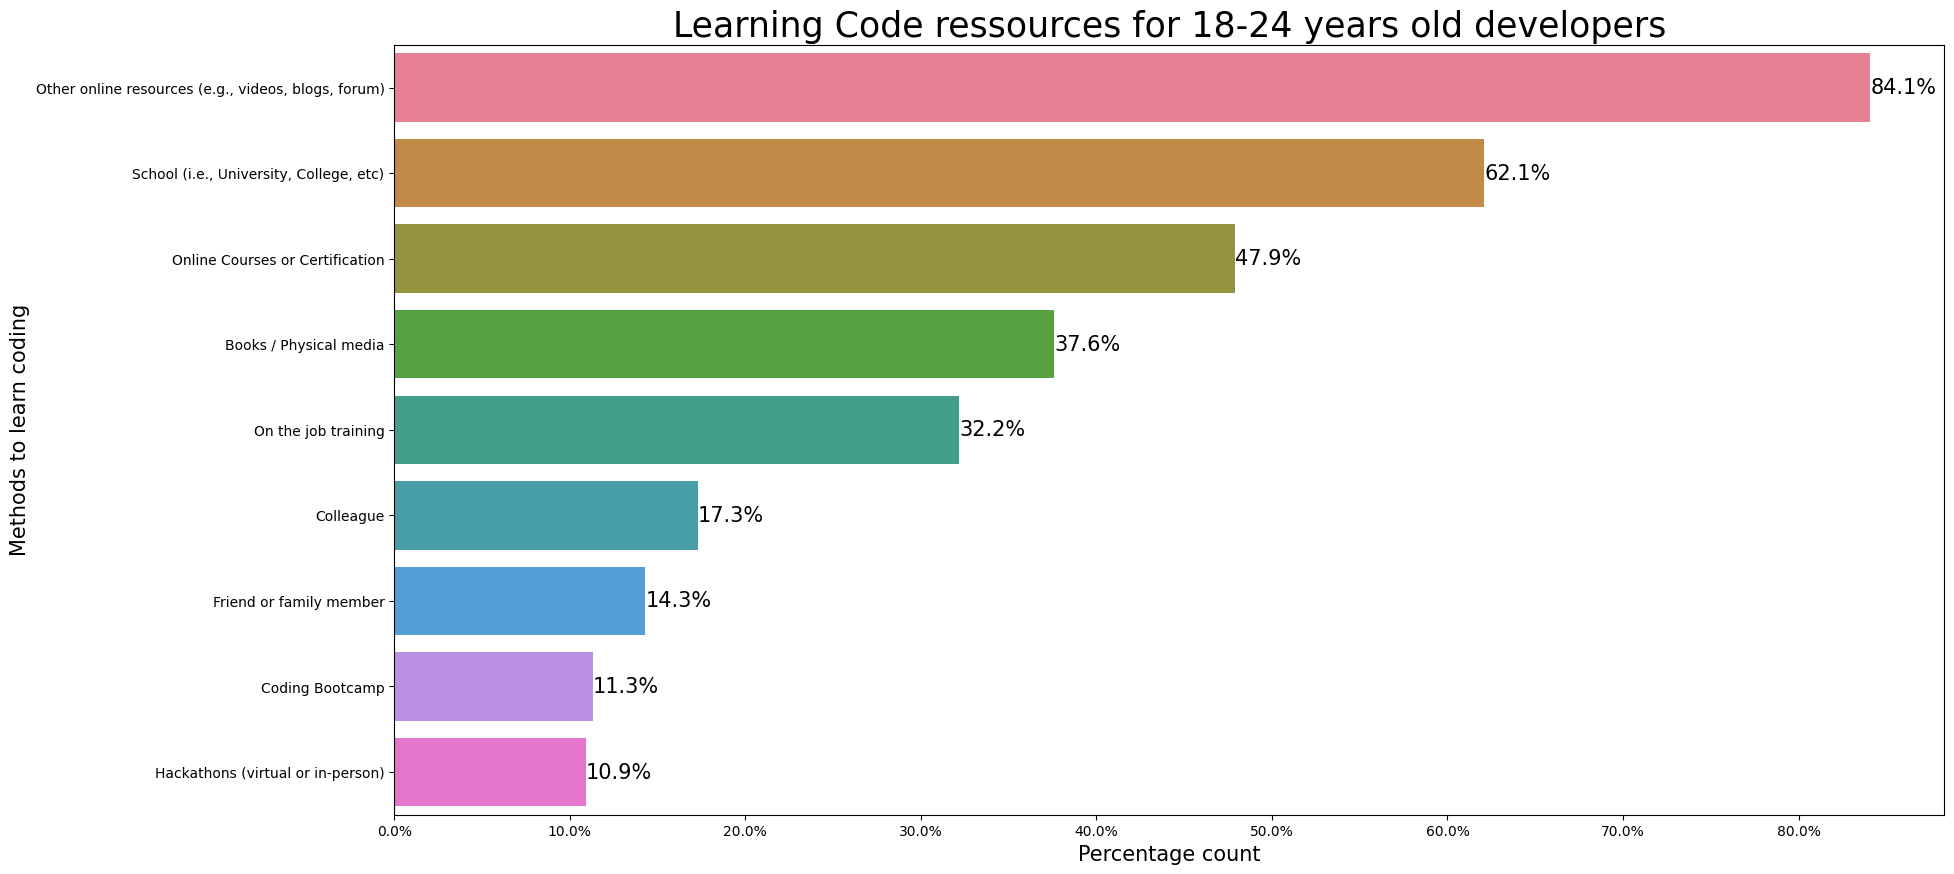

In [264]:
fig = plt.figure(figsize=(20,10))
colors = sns.color_palette("husl", len(segment_grouped_dfs[('18-24 years old',)]))
ax = sns.barplot(data=segment_grouped_dfs[('18-24 years old',)],
            x='Percentage',
            y= 'LearnCode',
            orient = 'h',
            palette=colors,
            hue='LearnCode',  
            legend=False)

for index, value in enumerate(segment_grouped_dfs[('18-24 years old',)]['Percentage']):
    plt.text(value, index, f'{value}%', va='center', fontsize = 15)
    
  
def add_percent_sign(x, pos):
    return f'{x}%'


plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(add_percent_sign))
plt.title('Learning Code ressources for 18-24 years old developers', fontsize = 25)
ax.set_xlabel('Percentage count', fontsize = 15)
ax.set_ylabel('Methods to learn coding', fontsize = 15)
plt.show()

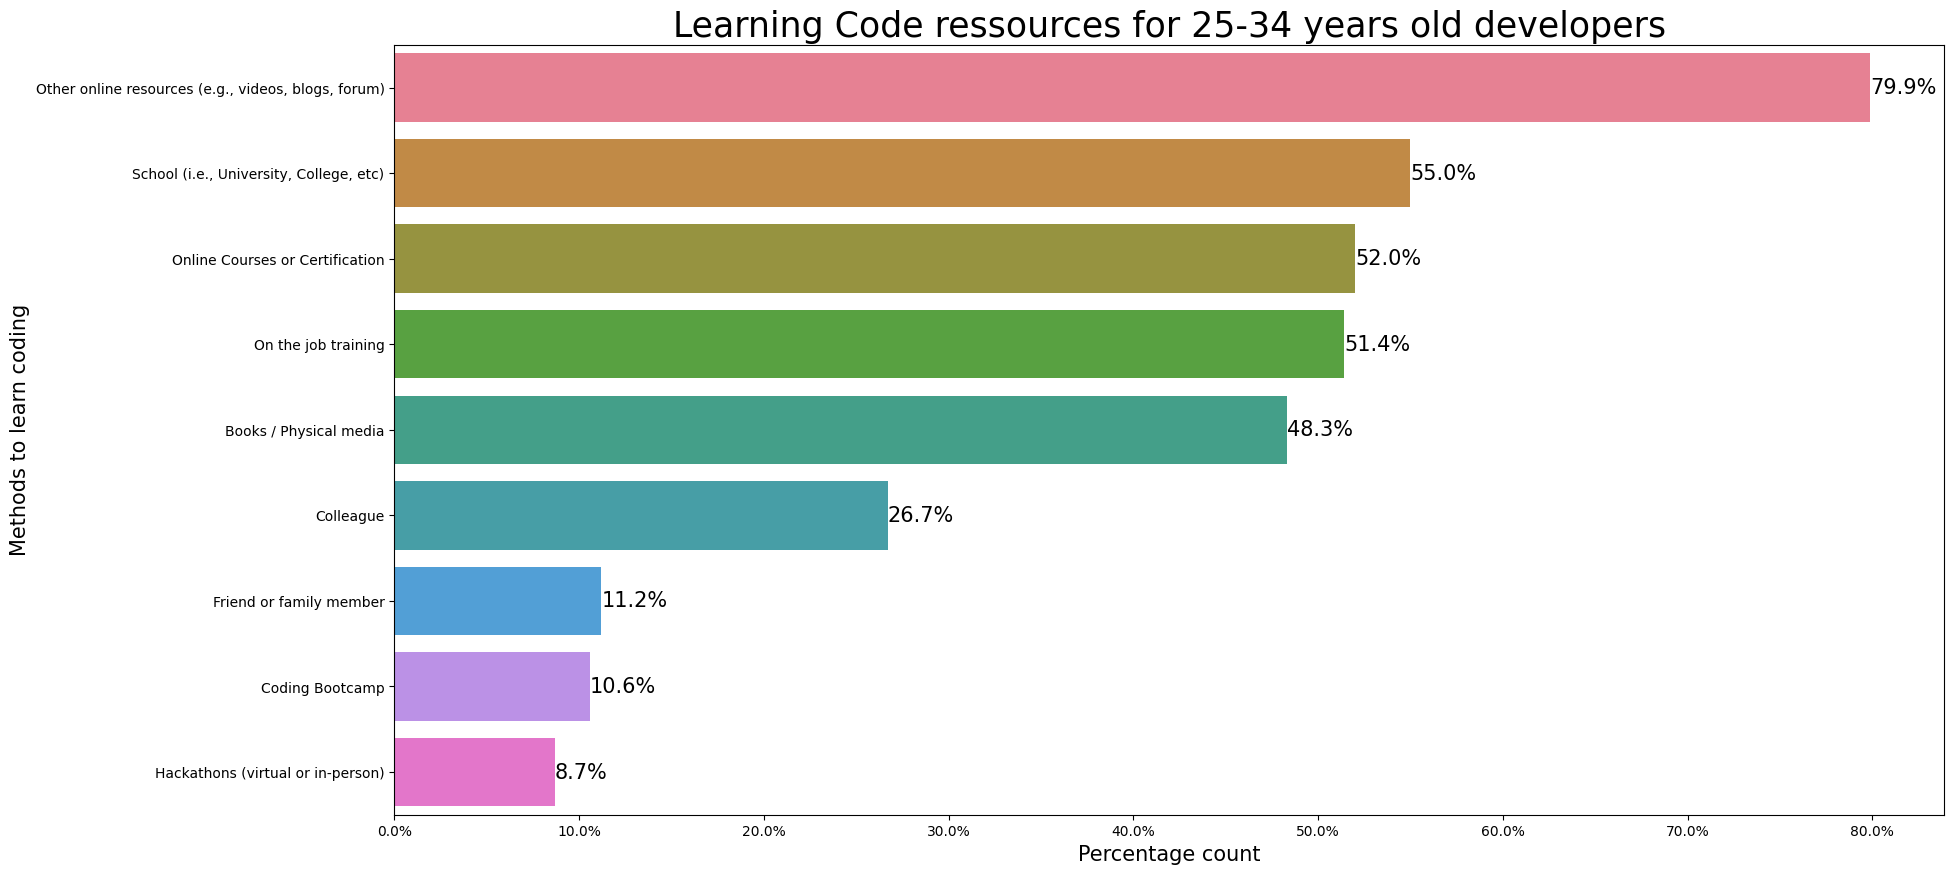

In [265]:
fig = plt.figure(figsize=(20,10))
colors = sns.color_palette("husl", len(segment_grouped_dfs[('25-34 years old',)]))
ax = sns.barplot(data=segment_grouped_dfs[('25-34 years old',)],
            x='Percentage',
            y= 'LearnCode',
            orient = 'h',
            palette=colors,
            hue='LearnCode',  
            legend=False)

for index, value in enumerate(segment_grouped_dfs[('25-34 years old',)]['Percentage']):
    plt.text(value, index, f'{value}%', va='center', fontsize = 15)
    
  
def add_percent_sign(x, pos):
    return f'{x}%'


plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(add_percent_sign))
plt.title('Learning Code ressources for 25-34 years old developers', fontsize = 25)
ax.set_xlabel('Percentage count', fontsize = 15)
ax.set_ylabel('Methods to learn coding', fontsize = 15)
plt.show()

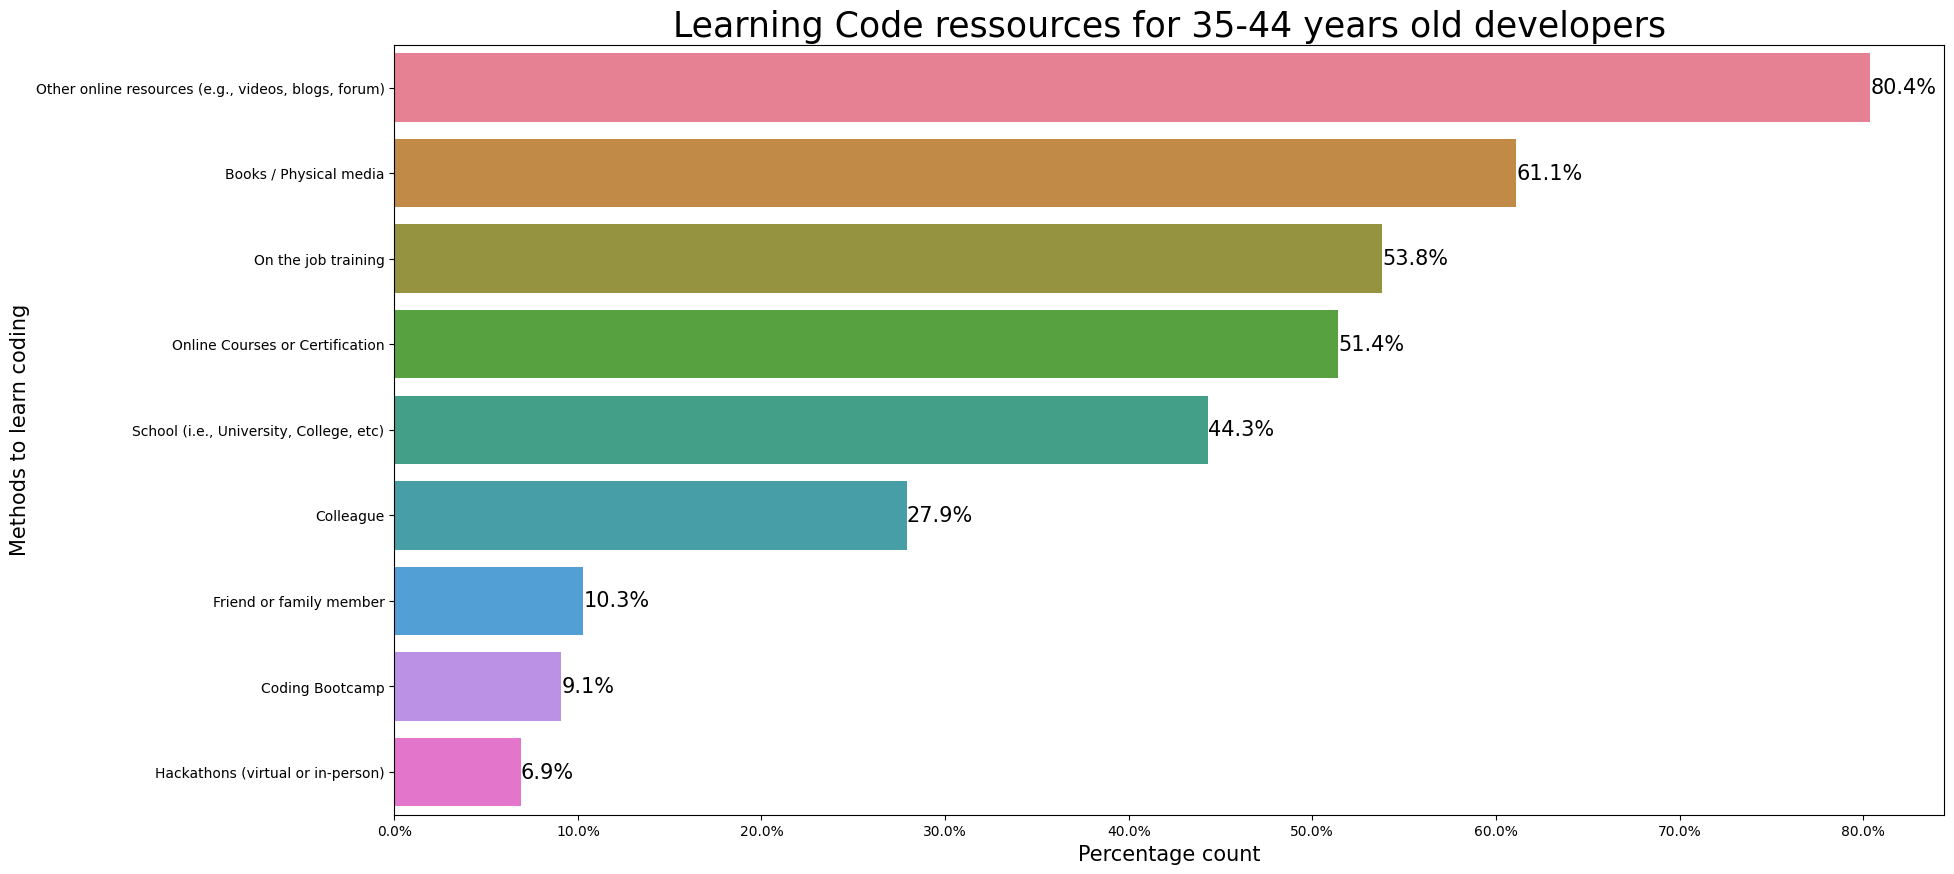

In [266]:
fig = plt.figure(figsize=(20,10))
colors = sns.color_palette("husl", len(segment_grouped_dfs[('35-44 years old',)]))
ax = sns.barplot(data=segment_grouped_dfs[('35-44 years old',)],
            x='Percentage',
            y= 'LearnCode',
            orient = 'h',
            palette=colors,
            hue='LearnCode',  
            legend=False)

for index, value in enumerate(segment_grouped_dfs[('35-44 years old',)]['Percentage']):
    plt.text(value, index, f'{value}%', va='center', fontsize = 15)
    
  
def add_percent_sign(x, pos):
    return f'{x}%'


plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(add_percent_sign))
plt.title('Learning Code ressources for 35-44 years old developers', fontsize = 25)
ax.set_xlabel('Percentage count', fontsize = 15)
ax.set_ylabel('Methods to learn coding', fontsize = 15)
plt.show()

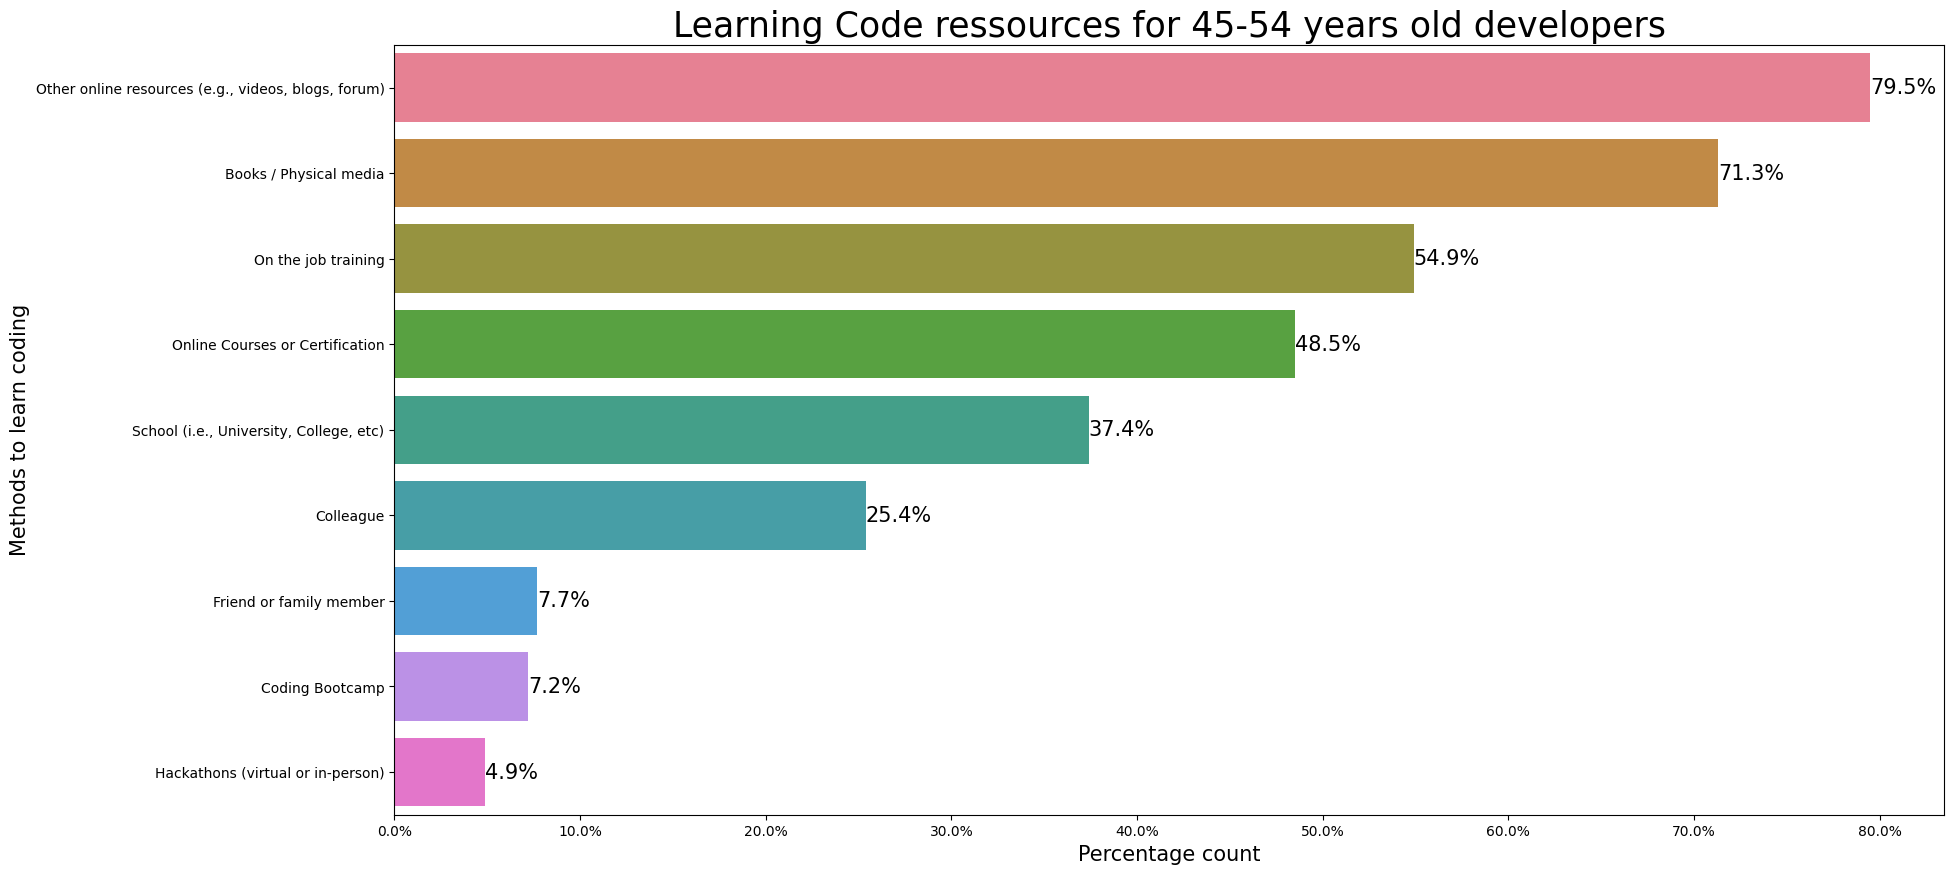

In [267]:
fig = plt.figure(figsize=(20,10))
colors = sns.color_palette("husl", len(segment_grouped_dfs[('45-54 years old',)]))
ax = sns.barplot(data=segment_grouped_dfs[('45-54 years old',)],
            x='Percentage',
            y= 'LearnCode',
            orient = 'h',
            palette=colors,
            hue='LearnCode',  
            legend=False)

for index, value in enumerate(segment_grouped_dfs[('45-54 years old',)]['Percentage']):
    plt.text(value, index, f'{value}%', va='center', fontsize = 15)
    
  
def add_percent_sign(x, pos):
    return f'{x}%'


plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(add_percent_sign))
plt.title('Learning Code ressources for 45-54 years old developers', fontsize = 25)
ax.set_xlabel('Percentage count', fontsize = 15)
ax.set_ylabel('Methods to learn coding', fontsize = 15)
plt.show()

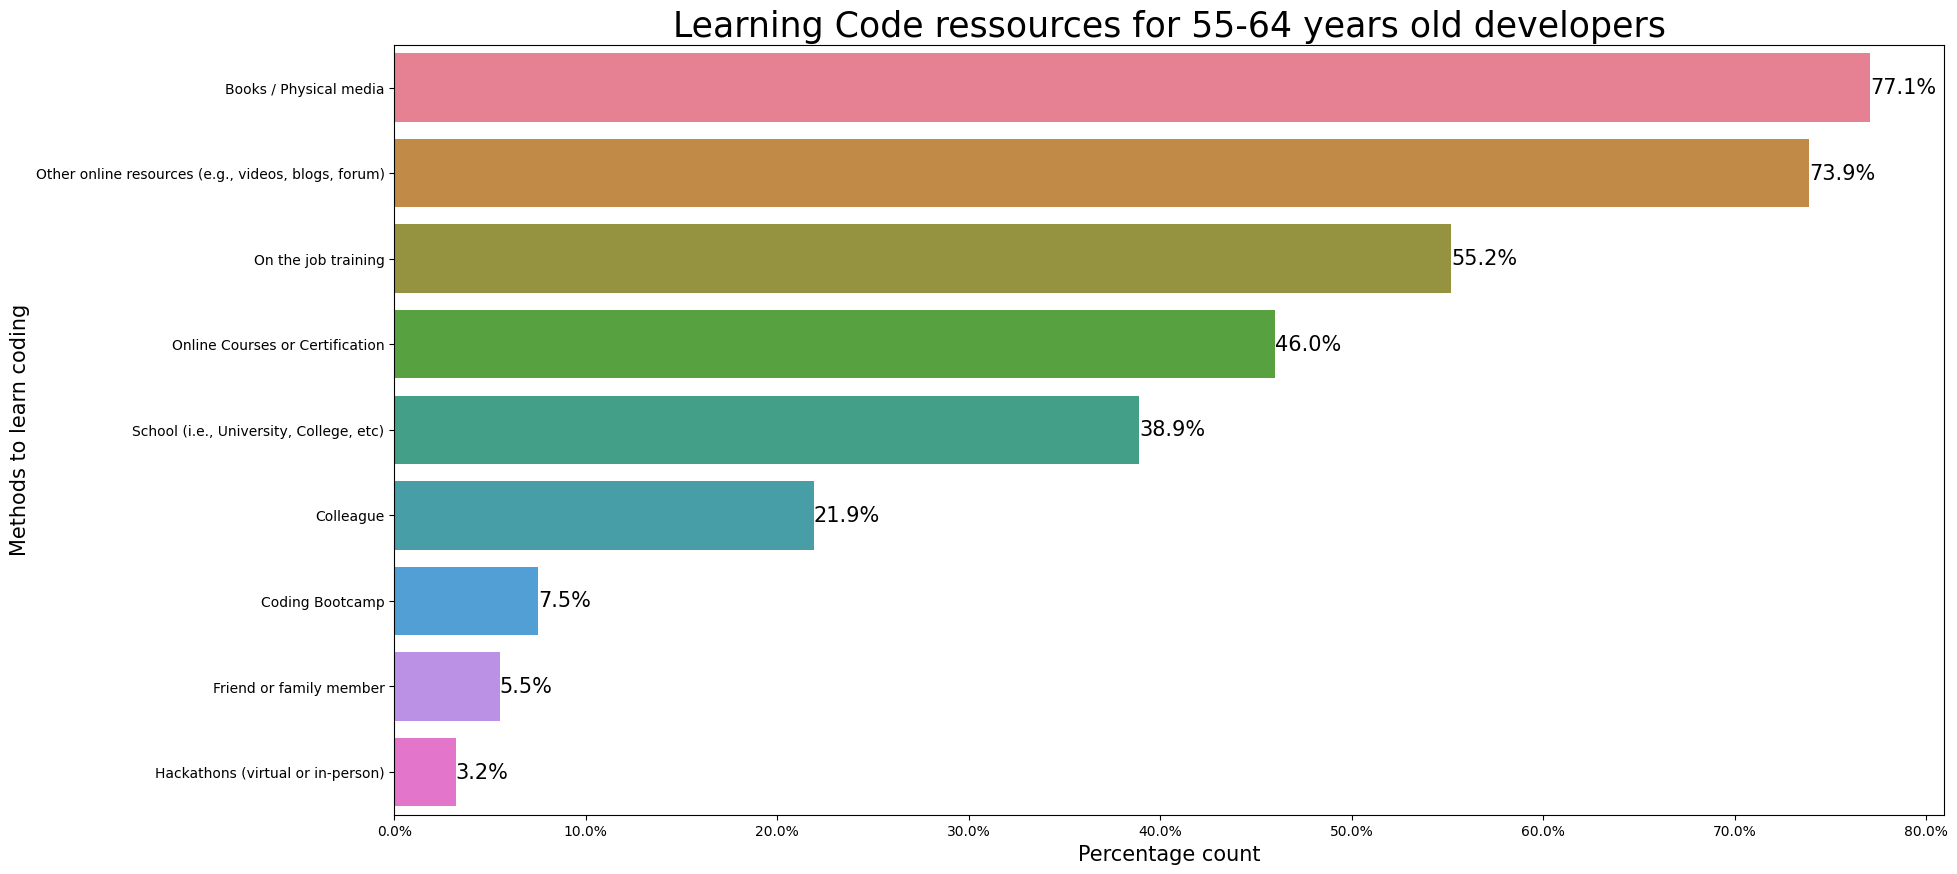

In [268]:
fig = plt.figure(figsize=(20,10))
colors = sns.color_palette("husl", len(segment_grouped_dfs[('55-64 years old',)]))
ax = sns.barplot(data=segment_grouped_dfs[('55-64 years old',)],
            x='Percentage',
            y= 'LearnCode',
            orient = 'h',
            palette=colors,
            hue='LearnCode',  
            legend=False)

for index, value in enumerate(segment_grouped_dfs[('55-64 years old',)]['Percentage']):
    plt.text(value, index, f'{value}%', va='center', fontsize = 15)
    
  
def add_percent_sign(x, pos):
    return f'{x}%'


plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(add_percent_sign))
plt.title('Learning Code ressources for 55-64 years old developers', fontsize = 25)
ax.set_xlabel('Percentage count', fontsize = 15)
ax.set_ylabel('Methods to learn coding', fontsize = 15)
plt.show()

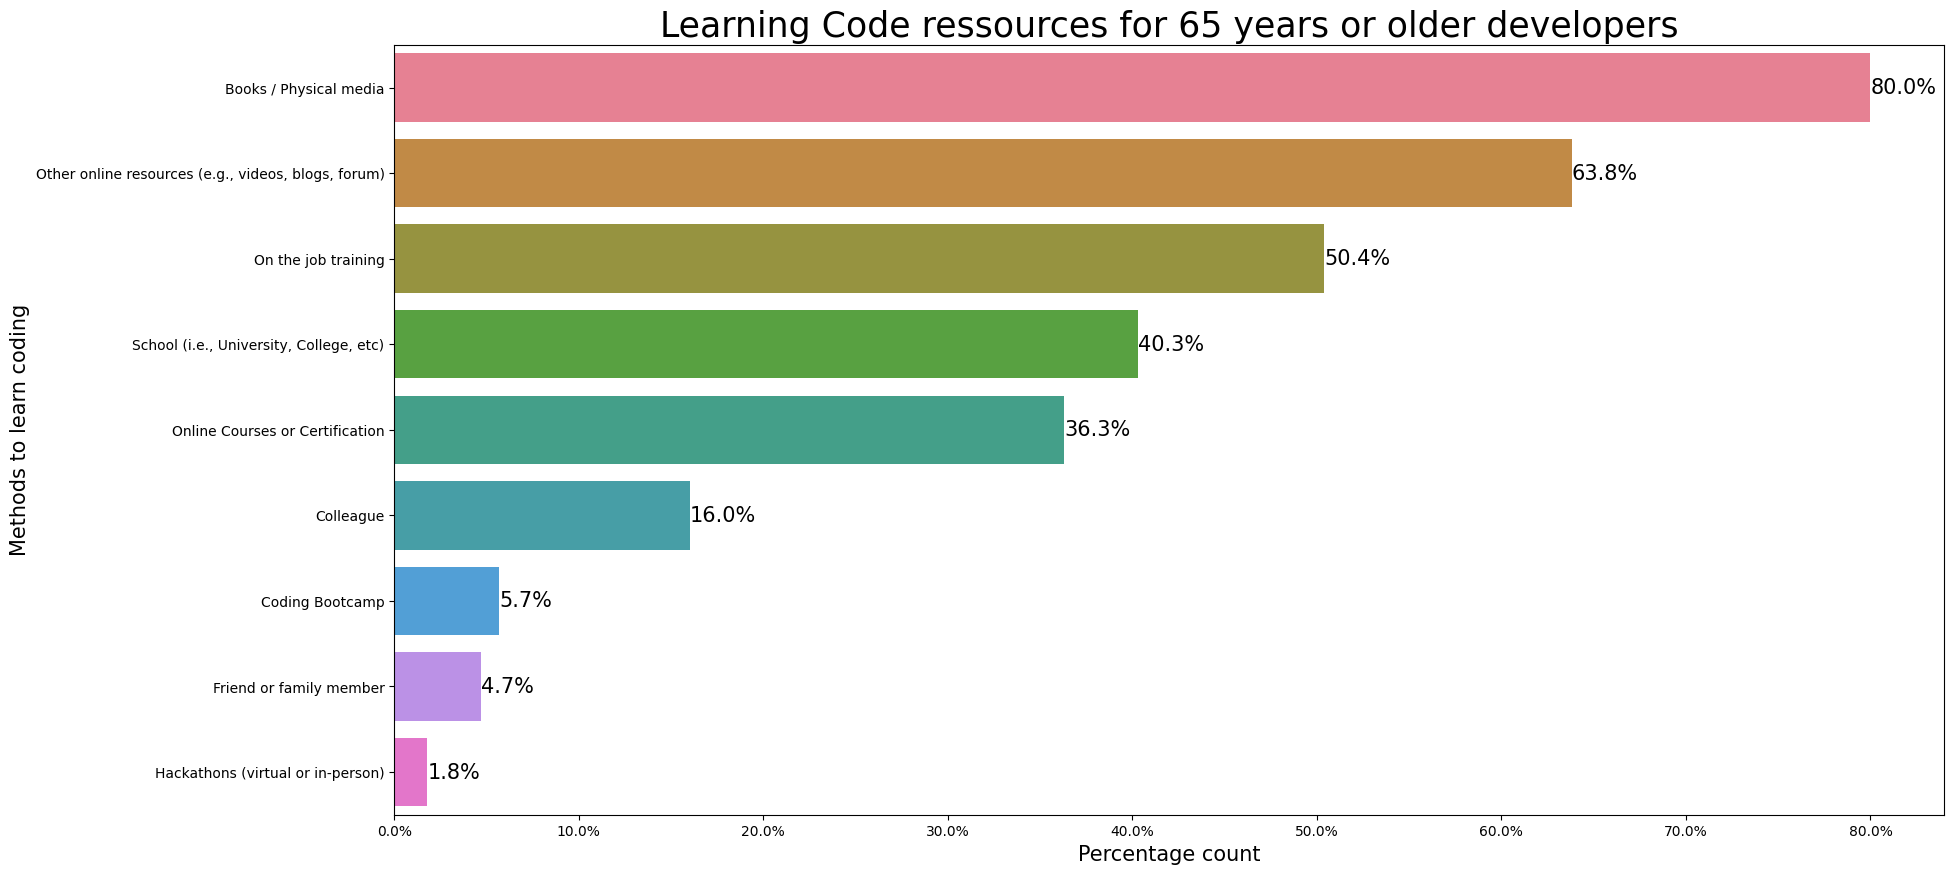

In [269]:
fig = plt.figure(figsize=(20,10))
colors = sns.color_palette("husl", len(segment_grouped_dfs[('65 years or older',)]))
ax = sns.barplot(data=segment_grouped_dfs[('65 years or older',)],
            x='Percentage',
            y= 'LearnCode',
            orient = 'h',
            palette=colors,
            hue='LearnCode',  
            legend=False)

for index, value in enumerate(segment_grouped_dfs[('65 years or older',)]['Percentage']):
    plt.text(value, index, f'{value}%', va='center', fontsize = 15)
    
  
def add_percent_sign(x, pos):
    return f'{x}%'


plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(add_percent_sign))
plt.title('Learning Code ressources for 65 years or older developers', fontsize = 25)
ax.set_xlabel('Percentage count', fontsize = 15)
ax.set_ylabel('Methods to learn coding', fontsize = 15)
plt.show()

In [270]:
"""
"Quelle est la méthode la plus populaire pour apprendre à coder ?" (par groupe d'âge)
À partir du diagramme en barres ci-dessus, nous pouvons tirer les conclusions suivantes :

Les développeurs de moins de 18 ans ont tendance à préférer les ressources en ligne telles que les vidéos, les blogs ou les forums (88,3 %) par rapport aux autres groupes d'âge en ce qui concerne les méthodes d'apprentissage du codage.

Les développeurs âgés de 25 à 34 ans étaient le groupe d'âge principal à avoir appris grâce à des cours en ligne ou des certifications (52 %), mais ils continuent également à apprendre davantage grâce à l'éducation formelle traditionnelle à l'école (55 %).

Bien que les ressources en ligne telles que les vidéos, les blogs ou les forums restent la méthode la plus populaire pour apprendre à coder pour la plupart des groupes d'âge, les développeurs âgés de 55 ans et plus ont tendance à apprendre plus souvent à partir de livres ou de supports physiques. La préférence pour des formes plus traditionnelles de supports éducatifs peut être due au manque de ressources en ligne pendant l'éducation de ces développeurs plus âgés.

Cependant, il est important de noter que ces ressources en ligne restent la deuxième 
"""

'\n"Quelle est la méthode la plus populaire pour apprendre à coder ?" (par groupe d\'âge)\nÀ partir du diagramme en barres ci-dessus, nous pouvons tirer les conclusions suivantes :\n\nLes développeurs de moins de 18 ans ont tendance à préférer les ressources en ligne telles que les vidéos, les blogs ou les forums (88,3 %) par rapport aux autres groupes d\'âge en ce qui concerne les méthodes d\'apprentissage du codage.\n\nLes développeurs âgés de 25 à 34 ans étaient le groupe d\'âge principal à avoir appris grâce à des cours en ligne ou des certifications (52 %), mais ils continuent également à apprendre davantage grâce à l\'éducation formelle traditionnelle à l\'école (55 %).\n\nBien que les ressources en ligne telles que les vidéos, les blogs ou les forums restent la méthode la plus populaire pour apprendre à coder pour la plupart des groupes d\'âge, les développeurs âgés de 55 ans et plus ont tendance à apprendre plus souvent à partir de livres ou de supports physiques. La préférence

In [271]:

ConvertedComp_cleaned_df = df.dropna(subset=['ConvertedCompYearly'])
ConvertedComp_cleaned_df['ConvertedCompYearly'].isna().sum()
print(ConvertedComp_cleaned_df.shape)


(48019, 84)


In [272]:
ConvComp_DevType_cleaned_df = ConvertedComp_cleaned_df.dropna(subset=['DevType'])
print(ConvComp_DevType_cleaned_df['DevType'].isna().sum())
print(ConvComp_DevType_cleaned_df.shape)

0
(47904, 84)


In [273]:
print(ConvComp_DevType_cleaned_df['DevType'].unique())

['Senior Executive (C-Suite, VP, etc.)' 'Developer, back-end'
 'Developer, front-end' 'Developer, full-stack' 'System administrator'
 'Developer, QA or test' 'Designer'
 'Data scientist or machine learning specialist'
 'Data or business analyst' 'Security professional'
 'Research & Development role' 'Developer, mobile'
 'Database administrator' 'Developer, embedded applications or devices'
 'Developer, desktop or enterprise applications' 'Engineer, data'
 'Product manager' 'Academic researcher' 'Cloud infrastructure engineer'
 'Other (please specify):' 'Developer Experience' 'Engineering manager'
 'DevOps specialist' 'Engineer, site reliability' 'Project manager'
 'Blockchain' 'Developer, game or graphics' 'Developer Advocate'
 'Hardware Engineer' 'Educator' 'Scientist'
 'Marketing or sales professional' 'Student']


In [274]:

mask4 = ConvComp_DevType_cleaned_df['DevType'] != 'Other (please specify):'
ConvComp_DevType_cleaned_df = ConvComp_DevType_cleaned_df[mask4]
print(ConvComp_DevType_cleaned_df['DevType'].unique())
ConvComp_DevType_cleaned_df['DevType'].value_counts()

['Senior Executive (C-Suite, VP, etc.)' 'Developer, back-end'
 'Developer, front-end' 'Developer, full-stack' 'System administrator'
 'Developer, QA or test' 'Designer'
 'Data scientist or machine learning specialist'
 'Data or business analyst' 'Security professional'
 'Research & Development role' 'Developer, mobile'
 'Database administrator' 'Developer, embedded applications or devices'
 'Developer, desktop or enterprise applications' 'Engineer, data'
 'Product manager' 'Academic researcher' 'Cloud infrastructure engineer'
 'Developer Experience' 'Engineering manager' 'DevOps specialist'
 'Engineer, site reliability' 'Project manager' 'Blockchain'
 'Developer, game or graphics' 'Developer Advocate' 'Hardware Engineer'
 'Educator' 'Scientist' 'Marketing or sales professional' 'Student']


DevType
Developer, full-stack                            17060
Developer, back-end                               9557
Developer, front-end                              3271
Developer, desktop or enterprise applications     2435
Developer, mobile                                 1646
Engineering manager                               1311
Developer, embedded applications or devices       1267
Data scientist or machine learning specialist      992
DevOps specialist                                  982
Engineer, data                                     904
Research & Development role                        827
Senior Executive (C-Suite, VP, etc.)               776
Cloud infrastructure engineer                      766
Academic researcher                                615
Developer, game or graphics                        491
Data or business analyst                           450
Developer, QA or test                              360
System administrator                               328
En

In [275]:
ConvComp_DevType_cleaned_df['ConvertedCompYearly'].notna().sum()

46411

In [276]:
grouped_df = ConvComp_DevType_cleaned_df.groupby(['DevType'])['ConvertedCompYearly'].median().reset_index()

# Sort the new dataframe for better visualisation in barplot

grouped_df.sort_values(['ConvertedCompYearly'], ascending=False, inplace = True)

grouped_df = grouped_df.reset_index()

grouped_df.head()

,index,DevType,ConvertedCompYearly
0,29,"Senior Executive (C-Suite, VP, etc.)",124753.5
1,21,Engineering manager,124138.0
2,23,Marketing or sales professional,116000.0
3,20,"Engineer, site reliability",115657.0
4,9,Developer Experience,107090.0


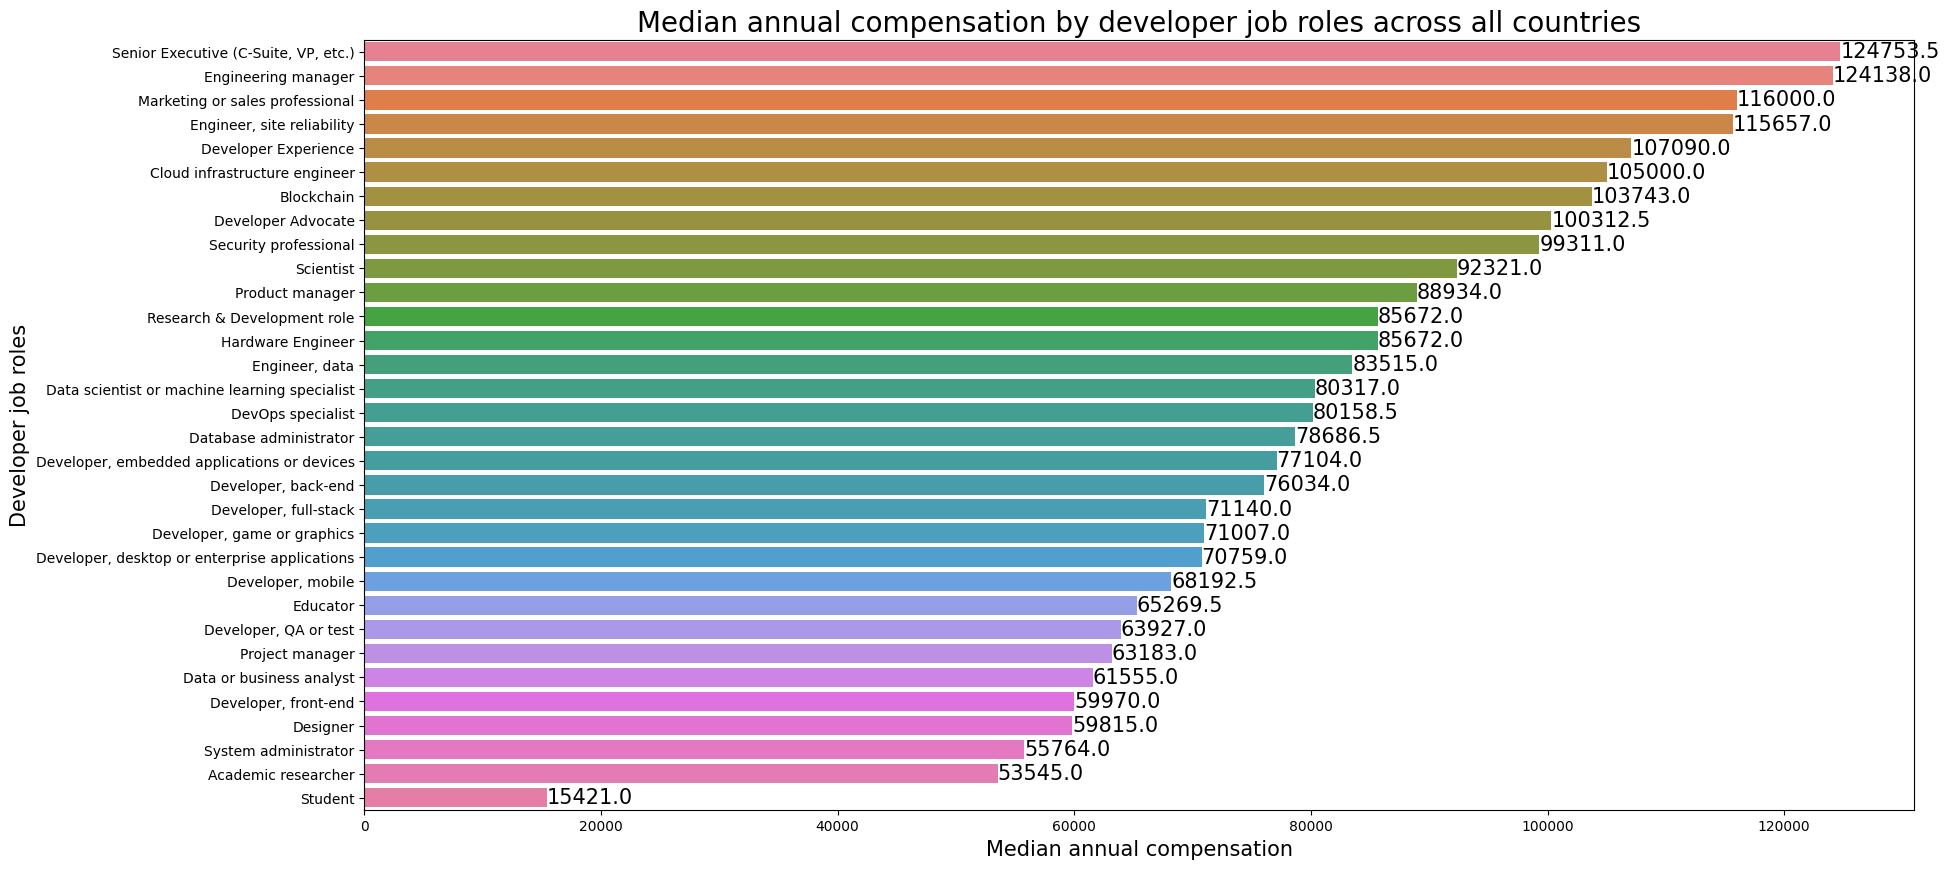

In [277]:
fig = plt.figure(figsize=(20,10))
colors = sns.color_palette("husl", len(grouped_df))

ax = sns.barplot(data=grouped_df,
            x= 'ConvertedCompYearly',
            y='DevType',palette=colors,
            hue='DevType',
                legend=False)
for index, value in enumerate(grouped_df['ConvertedCompYearly']):
    plt.text(value, index, f'{value}', va='center', fontsize = 15)

ax.set_xlabel('Median annual compensation',fontsize = 15)
ax.set_ylabel('Developer job roles',fontsize = 15)
plt.title('Median annual compensation by developer job roles across all countries', fontsize = 20)
plt.show()

In [278]:
"""
"Quels sont les rôles qui rémunèrent le mieux les développeurs ?"
Le graphique en barres ci-dessus montre qu'avec les 46 411 réponses valides de l'enquête, les rôles de 'Senior Executive' et 'Engineering Manager' occupent les deux premières positions en termes de compensations annuelles médianes les plus élevées pour les rôles de développeur, converties en dollars américains. Des postes seniors comme ceux-ci sont généralement attribués aux employés ayant plus d'expérience en plus du codage et des responsabilités plus importantes, ce qui se traduit par une rémunération plus élevée que pour les employés juniors.

Les autres rôles très rémunérés en dehors de ces postes seniors comprennent : 'Marketing or sales professional', 'Engineer, site reliability' et 'Developer Experience'. Les nouveaux développeurs potentiels cherchant à obtenir une rémunération plus élevée peuvent développer leurs compétences et leur expérience pour décrocher un emploi dans ces rôles.

Sans surprise, le rôle de 'Student' a la rémunération médiane la plus basse, inférieure à la moitié de celle du deuxième rôle rémunérateur le moins élevé, ''Academic researcher'. Cela est attendu car le rôle représente probablement des stagiaires étudiants qui sont généralement moins rémunérés par rapport à d'autres rôles permanents ou contractuels avec des périmètres d'emploi plus étendus.
"""

'\n"Quels sont les rôles qui rémunèrent le mieux les développeurs ?"\nLe graphique en barres ci-dessus montre qu\'avec les 46 411 réponses valides de l\'enquête, les rôles de \'Senior Executive\' et \'Engineering Manager\' occupent les deux premières positions en termes de compensations annuelles médianes les plus élevées pour les rôles de développeur, converties en dollars américains. Des postes seniors comme ceux-ci sont généralement attribués aux employés ayant plus d\'expérience en plus du codage et des responsabilités plus importantes, ce qui se traduit par une rémunération plus élevée que pour les employés juniors.\n\nLes autres rôles très rémunérés en dehors de ces postes seniors comprennent : \'Marketing or sales professional\', \'Engineer, site reliability\' et \'Developer Experience\'. Les nouveaux développeurs potentiels cherchant à obtenir une rémunération plus élevée peuvent développer leurs compétences et leur expérience pour décrocher un emploi dans ces rôles.\n\nSans su

In [279]:
ConvComp_DevType_cleaned_df['YearsCodePro'].isna().sum()


169

In [280]:
cleaned_YearsCode_df = ConvComp_DevType_cleaned_df.dropna(subset=['YearsCodePro'])
cleaned_YearsCode_df['YearsCodePro'].isna().sum()


0

In [281]:
print(cleaned_YearsCode_df['YearsCodePro'].unique())

['9' '23' '7' '4' '21' '3' '15' 'Less than 1 year' '10' '2' '6' '14' '5'
 '19' '13' '16' '28' '30' '11' '8' '24' '40' '17' '29' '25' '12' '20' '18'
 '27' '43' '26' '1' '38' '33' '22' '35' '31' '34' '32' '37' '42'
 'More than 50 years' '36' '39' '41' '44' '50' '48' '45' '46' '47' '49']


In [282]:
cleaned_YearsCode_df.loc[:, 'YearsCodePro'] = cleaned_YearsCode_df['YearsCodePro'].replace({'Less than 1 year': '0', 'More than 50 years': '51'})
print(cleaned_YearsCode_df['YearsCodePro'].unique())


['9' '23' '7' '4' '21' '3' '15' '0' '10' '2' '6' '14' '5' '19' '13' '16'
 '28' '30' '11' '8' '24' '40' '17' '29' '25' '12' '20' '18' '27' '43' '26'
 '1' '38' '33' '22' '35' '31' '34' '32' '37' '42' '51' '36' '39' '41' '44'
 '50' '48' '45' '46' '47' '49']


In [286]:
cleaned_YearsCode_df = cleaned_YearsCode_df.copy()
cleaned_YearsCode_df['YearsCodePro'] = cleaned_YearsCode_df['YearsCodePro'].astype(int)

cleaned_YearsCode_df.loc[:, 'YearsCodePro'] = cleaned_YearsCode_df['YearsCodePro']

cleaned_YearsCode_df['YearsCodePro'].dtype

grouped_df_YearsCode = cleaned_YearsCode_df.groupby(['DevType']).agg({
    'ConvertedCompYearly': 'median',
    'YearsCodePro': 'mean'
}).reset_index()

grouped_df_YearsCode.head()


,DevType,ConvertedCompYearly,YearsCodePro
0,Academic researcher,53545.0,9.900000
1,Blockchain,103743.0,9.389189
2,Cloud infrastructure engineer,105000.0,10.490170
3,Data or business analyst,62069.0,8.771812
4,Data scientist or machine learning specialist,80317.0,7.473205


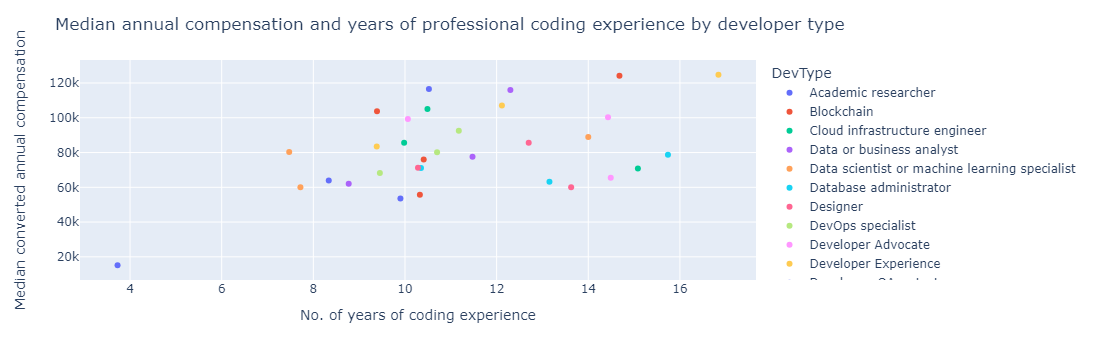

In [284]:

fig = px.scatter(grouped_df_YearsCode, x='YearsCodePro', y='ConvertedCompYearly', text='DevType', color ='DevType')


fig.update_traces(textposition='top center', mode='markers')


fig.update_layout(
    title='Median annual compensation and years of professional coding experience by developer type',
    xaxis_title='No. of years of coding experience',
    yaxis_title='Median converted annual compensation',
    hovermode='closest')

fig.show()

In [285]:
"""
 "Comment l'expérience en codage influence le niveau de rémunération"
Selon le nuage de points ci-dessus, qui représente 45 061 réponses valides à l'enquête, le nombre d'années d'expérience professionnelle en codage semble être le facteur déterminant pour une rémunération plus élevée. Les trois rôles les mieux rémunérés ('Senior executive', 'Engineering manager' et 'Engineer,site reliability') ont, en moyenne, plus de 10 ans d'expérience en codage professionnel. Pendant ce temps, des rôles tels que 'System Administrator' et 'Academic researcher' ne sont pas aussi bien rémunérés même avec des niveaux similaires d'expérience en codage.
"""

'\n "Comment l\'expérience en codage influence le niveau de rémunération"\nSelon le nuage de points ci-dessus, qui représente 45 061 réponses valides à l\'enquête, le nombre d\'années d\'expérience professionnelle en codage semble être le facteur déterminant pour une rémunération plus élevée. Les trois rôles les mieux rémunérés (\'Senior executive\', \'Engineering manager\' et \'Engineer,site reliability\') ont, en moyenne, plus de 10 ans d\'expérience en codage professionnel. Pendant ce temps, des rôles tels que \'System Administrator\' et \'Academic researcher\' ne sont pas aussi bien rémunérés même avec des niveaux similaires d\'expérience en codage.\n'